# **Lecture 18: Introduction to APIs & Requests module in Python**

**Author Name :** Ahsan Ali Rajpoot  
- **LinkedIn :** [linkedin.com/in/iamahsanalirajpoot](https://www.linkedin.com/in/iamahsanalirajpoot)  
- **Facebook :** [facebook.com/iamahsanalirajpoot](https://www.facebook.com/iamahsanalirajpoot)  
- **GitHub :** [github.com/iamahsanalirajpoot](https://github.com/iamahsanalirajpoot)  
- **Kaggle :** [kaggle.com/ahsanalirajpoot](https://www.kaggle.com/ahsanalirajpoot)

## **What is an API?**

- Stands for Application Programming Interface.
- A set of rules and protocols that allows different software applications to communicate with each other.
- Allow programs to send requests and get responses.

**Real-Life Analogy: Restaurant**

**You** = Customer who wants to order food (Client Program)
**Waiter** = API that takes your order and communicates with the kitchen (API Server)
**Kitchen** = Restaurant's kitchen that prepares the food (Backend Data/Service)

**The API Connects the Client Requests to the Server Responses**

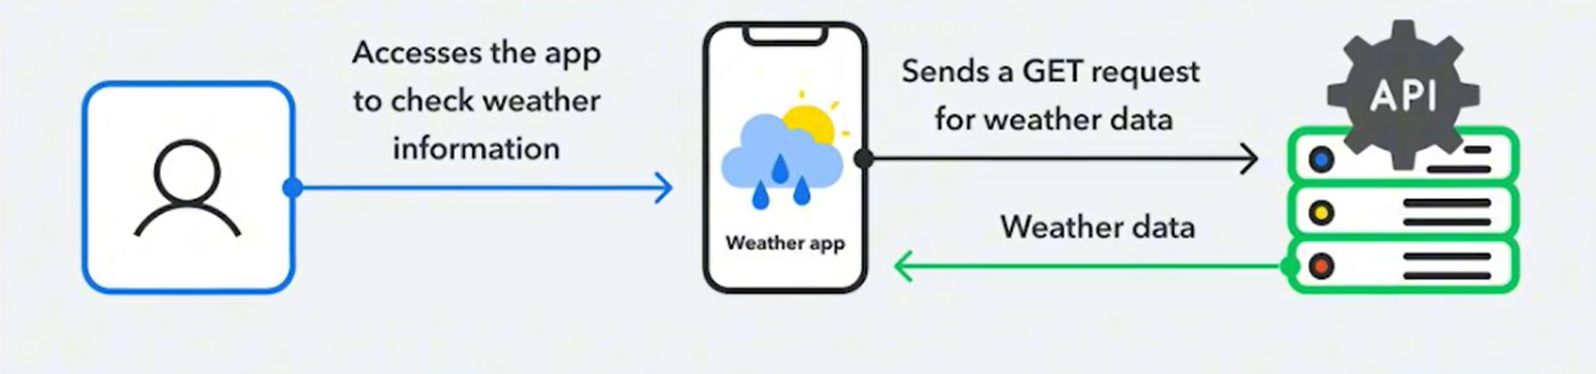

### **How Does an API Works?**

**Request:** You ask for something (e.g., Data)\
**Processing:** The server processes your request\
**Response:** The server sends back the requested data or an error if not available

**An API shared agreement between client and server outlining what requests you can make and what responses you'll get back. It abstracts away the complexity so both sides just follow the same rules.**

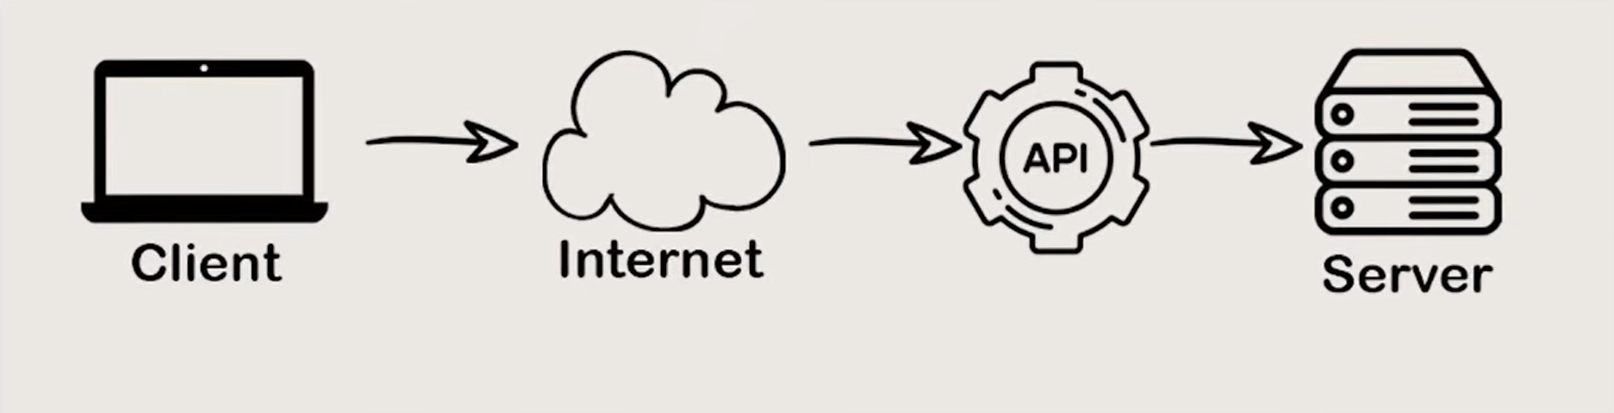

### **Types of APIs**

- **REST APIs:** Representational State Transfer, uses HTTP methods (GET, POST, PUT, DELETE), most popular.    
- **SOAP APIs:** Simple Object Access Protocol, older style uses XML data.
- **GraphQL APIs:** Lets you request exactly what you want.

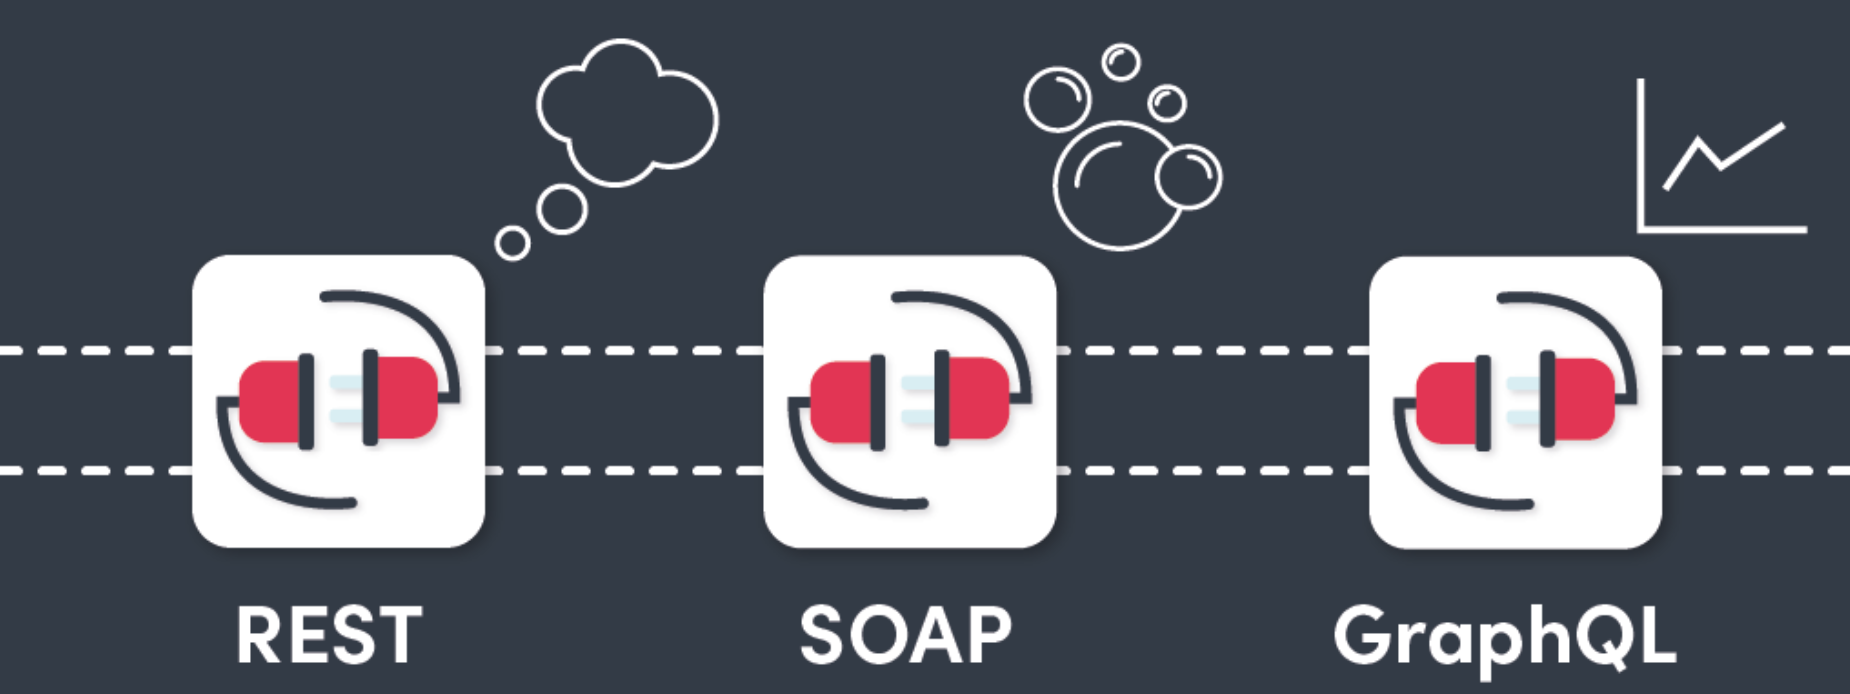

### **What is an API Endpoint**

- An API endpoint is a URL where you send your API requests.
- Each endpoint provides access to a specific data or services.

**Example:**

`https://api.weather.com/forecast for weather info`\
`https://api.twitter.com/tweets for tweets`

> **Note:** In this Notebook we will mainly focus on **REST APIs**

## **Request Module in Python**

The `requests` module in Python is a powerful library for making HTTP requests to APIs. It simplifies the process of sending requests and handling responses.

**Installing requests**

if you don't have the requests module installed, you can install it using pip:

`pip install requests`

### **Sending a GET Request**

- GET requests ask the server to send back data.
- Use the `requests.get()` method to make a GET request.
- Response contains status code and data (usually in JSON format).


Simple Example of a GET request:

In [33]:
import requests

# url for api endpoint
url = "https://randomuser.me/api/" # generates random user data (names, photos, etc.)

# sending the GET request
response = requests.get(url)

print("Status Code:", response.status_code) # status code 200 means api call has been successful, 404 means not found!
print("Response Content", response.json())

Status Code: 200
Response Content {'results': [{'gender': 'male', 'name': {'title': 'Mr', 'first': 'Samuel', 'last': 'Niva'}, 'location': {'street': {'number': 4151, 'name': 'Bulevardi'}, 'city': 'Miehikkälä', 'state': 'North Karelia', 'country': 'Finland', 'postcode': 70129, 'coordinates': {'latitude': '-24.8817', 'longitude': '-94.1005'}, 'timezone': {'offset': '0:00', 'description': 'Western Europe Time, London, Lisbon, Casablanca'}}, 'email': 'samuel.niva@example.com', 'login': {'uuid': 'da76085a-6e45-46b1-aee6-140311c1886f', 'username': 'tinykoala189', 'password': 'thecure', 'salt': 'z6qwzSgx', 'md5': 'a80de363ca67a87af64443d3d49dfa9e', 'sha1': '33e07f0bb14b97f4881d63befb86a8d107a19863', 'sha256': 'f86220ea58685aee8bd878966f24df3486d9844bea5737052f4a9c17dd1efb07'}, 'dob': {'date': '1961-04-03T05:55:01.411Z', 'age': 64}, 'registered': {'date': '2003-04-14T18:28:44.072Z', 'age': 22}, 'phone': '02-171-553', 'cell': '049-853-45-99', 'id': {'name': 'HETU', 'value': 'NaNNA457undefined'}

### **Sending Data With Post**

- POST requests send data to the server.
- Use the `requests.post()` method to send data.

Example of sending data with POST:

In [42]:
# Endpoint that accepts POST requests
url = "https://jsonplaceholder.typicode.com/posts"

# data to send
data = {
    "title" : "Profile",
    "name" : "Ahsan Rajpoot",
    "user_name" : "iamahsanalirajpoot" 
}

response = requests.post(url, json=data)

print("Status Code:", response.status_code)
print("Response Content:", response.json())

Status Code: 201
Response Content: {'title': 'Profile', 'name': 'Ahsan Rajpoot', 'user_name': 'iamahsanalirajpoot', 'id': 101}


## **Challenges**

*1: GET request to fetch posts; print status and first title*

In [ ]:
import requests

url = "https://jsonplaceholder.typicode.com/posts"
response = requests.get(url)

posts = response.json()

print("Status Code:", response.status_code)
print("First Post Title:", posts[0]['title'])

Status Code: 200
First Post Title: sunt aut facere repellat provident occaecati excepturi optio reprehenderit


*2: POST request to send new post data; print response*

In [49]:
url = "https://jsonplaceholder.typicode.com/posts"
data = {
    "title": "Learning APIs",
    "body": "Practicing POST request with JSONPlaceholder",
    "userId": 101
}

response = requests.post(url, json=data)

print("Status Code:", response.status_code)
print("Response:", response.json())


Status Code: 201
Response: {'title': 'Learning APIs', 'body': 'Practicing POST request with JSONPlaceholder', 'userId': 101, 'id': 101}


*3: Handle error when fetching a non-existent post (404)*

In [51]:
try:
    response = requests.get("https://jsonplaceholder.typicode.com/posts/999999") # non existance post
    if response.status_code == 404:
        print("404: Post not found.")
    else:
        response.raise_for_status()
        print("Post found:", response.json())

except requests.exceptions.RequestException as e:
    print("Request failed:", e)


404: Post not found.


*4: Add query parameters to GET request (e.g., userId=1)*

In [60]:
try:
    params = {"userId": 1}
    response = requests.get("https://jsonplaceholder.typicode.com/posts", params=params)

    posts = response.json()
    print(posts)

except requests.exceptions.RequestException as e:
    print("Request failed:", e)

[{'userId': 1, 'id': 1, 'title': 'sunt aut facere repellat provident occaecati excepturi optio reprehenderit', 'body': 'quia et suscipit\nsuscipit recusandae consequuntur expedita et cum\nreprehenderit molestiae ut ut quas totam\nnostrum rerum est autem sunt rem eveniet architecto'}, {'userId': 1, 'id': 2, 'title': 'qui est esse', 'body': 'est rerum tempore vitae\nsequi sint nihil reprehenderit dolor beatae ea dolores neque\nfugiat blanditiis voluptate porro vel nihil molestiae ut reiciendis\nqui aperiam non debitis possimus qui neque nisi nulla'}, {'userId': 1, 'id': 3, 'title': 'ea molestias quasi exercitationem repellat qui ipsa sit aut', 'body': 'et iusto sed quo iure\nvoluptatem occaecati omnis eligendi aut ad\nvoluptatem doloribus vel accusantium quis pariatur\nmolestiae porro eius odio et labore et velit aut'}, {'userId': 1, 'id': 4, 'title': 'eum et est occaecati', 'body': 'ullam et saepe reiciendis voluptatem adipisci\nsit amet autem assumenda provident rerum culpa\nquis hic c